<a href="https://colab.research.google.com/github/jarosas55/Pruebas-de-uso/blob/main/sleepDay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Procesamiento
import pandas as pd
import numpy as np
import datetime as dt
import missingno as msno

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [17]:
sleep = pd.read_csv('minuteSleep_merged.csv')

In [18]:
sleep

,Id,date,value,logId
0,1503960366,4/12/2016 2:47:30 AM,3,11380564589
1,1503960366,4/12/2016 2:48:30 AM,2,11380564589
2,1503960366,4/12/2016 2:49:30 AM,1,11380564589
3,1503960366,4/12/2016 2:50:30 AM,1,11380564589
4,1503960366,4/12/2016 2:51:30 AM,1,11380564589
...,...,...,...,...
188516,8792009665,5/4/2016 9:59:00 AM,1,11552534115
188517,8792009665,5/4/2016 10:00:00 AM,1,11552534115
188518,8792009665,5/4/2016 10:01:00 AM,1,11552534115
188519,8792009665,5/4/2016 10:02:00 AM,1,11552534115


In [45]:
sleep.head()

,Id,date,value,logId,value2
0,1503960366,2016-04-12 02:47:30,3,11380564589,3
1,1503960366,2016-04-12 02:48:30,2,11380564589,2
2,1503960366,2016-04-12 02:49:30,1,11380564589,1
3,1503960366,2016-04-12 02:50:30,1,11380564589,1
4,1503960366,2016-04-12 02:51:30,1,11380564589,1


In [4]:
sleep.tail()

,Id,date,value,logId
188516,8792009665,5/4/2016 9:59:00 AM,1,11552534115
188517,8792009665,5/4/2016 10:00:00 AM,1,11552534115
188518,8792009665,5/4/2016 10:01:00 AM,1,11552534115
188519,8792009665,5/4/2016 10:02:00 AM,1,11552534115
188520,8792009665,5/4/2016 10:03:00 AM,1,11552534115


In [19]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188521 entries, 0 to 188520
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Id      188521 non-null  int64 
 1   date    188521 non-null  object
 2   value   188521 non-null  int64 
 3   logId   188521 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 5.8+ MB


## Probamos la unificación de formatos

In [21]:
print(pd.to_datetime(sleep['date']).dt.strftime('%Y-%m-%d %H:%M:%S'))

0         2016-04-12 02:47:30
1         2016-04-12 02:48:30
2         2016-04-12 02:49:30
3         2016-04-12 02:50:30
4         2016-04-12 02:51:30
                 ...         
188516    2016-05-04 09:59:00
188517    2016-05-04 10:00:00
188518    2016-05-04 10:01:00
188519    2016-05-04 10:02:00
188520    2016-05-04 10:03:00
Name: date, Length: 188521, dtype: object


In [22]:
#Unificar el formato de fechas
sleep['date'] = pd.to_datetime(sleep['date']).dt.strftime('%Y-%m-%d %H:%M:%S')

## Trasformamos a tipo fecha

In [23]:
sleep['date'] = pd.to_datetime(sleep['date'], format='%Y-%m-%d %H:%M:%S')

In [24]:
sleep.head()

,Id,date,value,logId
0,1503960366,2016-04-12 02:47:30,3,11380564589
1,1503960366,2016-04-12 02:48:30,2,11380564589
2,1503960366,2016-04-12 02:49:30,1,11380564589
3,1503960366,2016-04-12 02:50:30,1,11380564589
4,1503960366,2016-04-12 02:51:30,1,11380564589


In [46]:
sleep.tail()

,Id,date,value,logId,value2
188516,8792009665,2016-05-04 09:59:00,1,11552534115,1
188517,8792009665,2016-05-04 10:00:00,1,11552534115,1
188518,8792009665,2016-05-04 10:01:00,1,11552534115,1
188519,8792009665,2016-05-04 10:02:00,1,11552534115,1
188520,8792009665,2016-05-04 10:03:00,1,11552534115,1


In [25]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188521 entries, 0 to 188520
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Id      188521 non-null  int64         
 1   date    188521 non-null  datetime64[ns]
 2   value   188521 non-null  int64         
 3   logId   188521 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.8 MB


## Trasformamos a tipo objeto

In [26]:
sleep['Id'] = sleep['Id'].astype(str)

In [27]:
sleep['logId'] = sleep['logId'].astype(str)

In [28]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188521 entries, 0 to 188520
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Id      188521 non-null  object        
 1   date    188521 non-null  datetime64[ns]
 2   value   188521 non-null  int64         
 3   logId   188521 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 5.8+ MB


## Analisamos ¿qué hay en las variebles?

In [31]:
sleep['value2'] = sleep['value'].astype(str)

In [38]:
sleep['Id'].unique()

array(['1503960366', '1644430081', '1844505072', '1927972279',
       '2026352035', '2320127002', '2347167796', '3977333714',
       '4020332650', '4319703577', '4388161847', '4445114986',
       '4558609924', '4702921684', '5553957443', '5577150313',
       '6117666160', '6775888955', '6962181067', '7007744171',
       '7086361926', '8053475328', '8378563200', '8792009665'],
      dtype=object)

In [39]:
len(sleep['Id'].unique())

24

In [41]:
sleep['value'].unique()

array([3, 2, 1])

In [42]:
sleep['logId'].unique()

array(['11380564589', '11388770715', '11388770716', '11402722600',
       '11421831252', '11421831253', '11421831254', '11439580762',
       '11447640793', '11455720858', '11467122444', '11474187653',
       '11486980511', '11493711616', '11510040462', '11517735116',
       '11522188936', '11531996212', '11540663911', '11548039064',
       '11562571546', '11569709241', '11576325621', '11582776423',
       '11591926984', '11611033063', '11611033064', '11523617009',
       '11524592517', '11548609830', '11608693255', '11403372987',
       '11523519346', '11530537917', '11372414035', '11374768075',
       '11376465497', '11384336437', '11398575572', '11401641693',
       '11492104450', '11507403943', '11372566564', '11382294591',
       '11391168707', '11399886313', '11407818391', '11415575687',
       '11432703842', '11441438237', '11450431030', '11459456610',
       '11464357502', '11473013379', '11479531689', '11496429833',
       '11504172158', '11512494969', '11519761551', '115263250

In [43]:
len(sleep['logId'].unique())

459

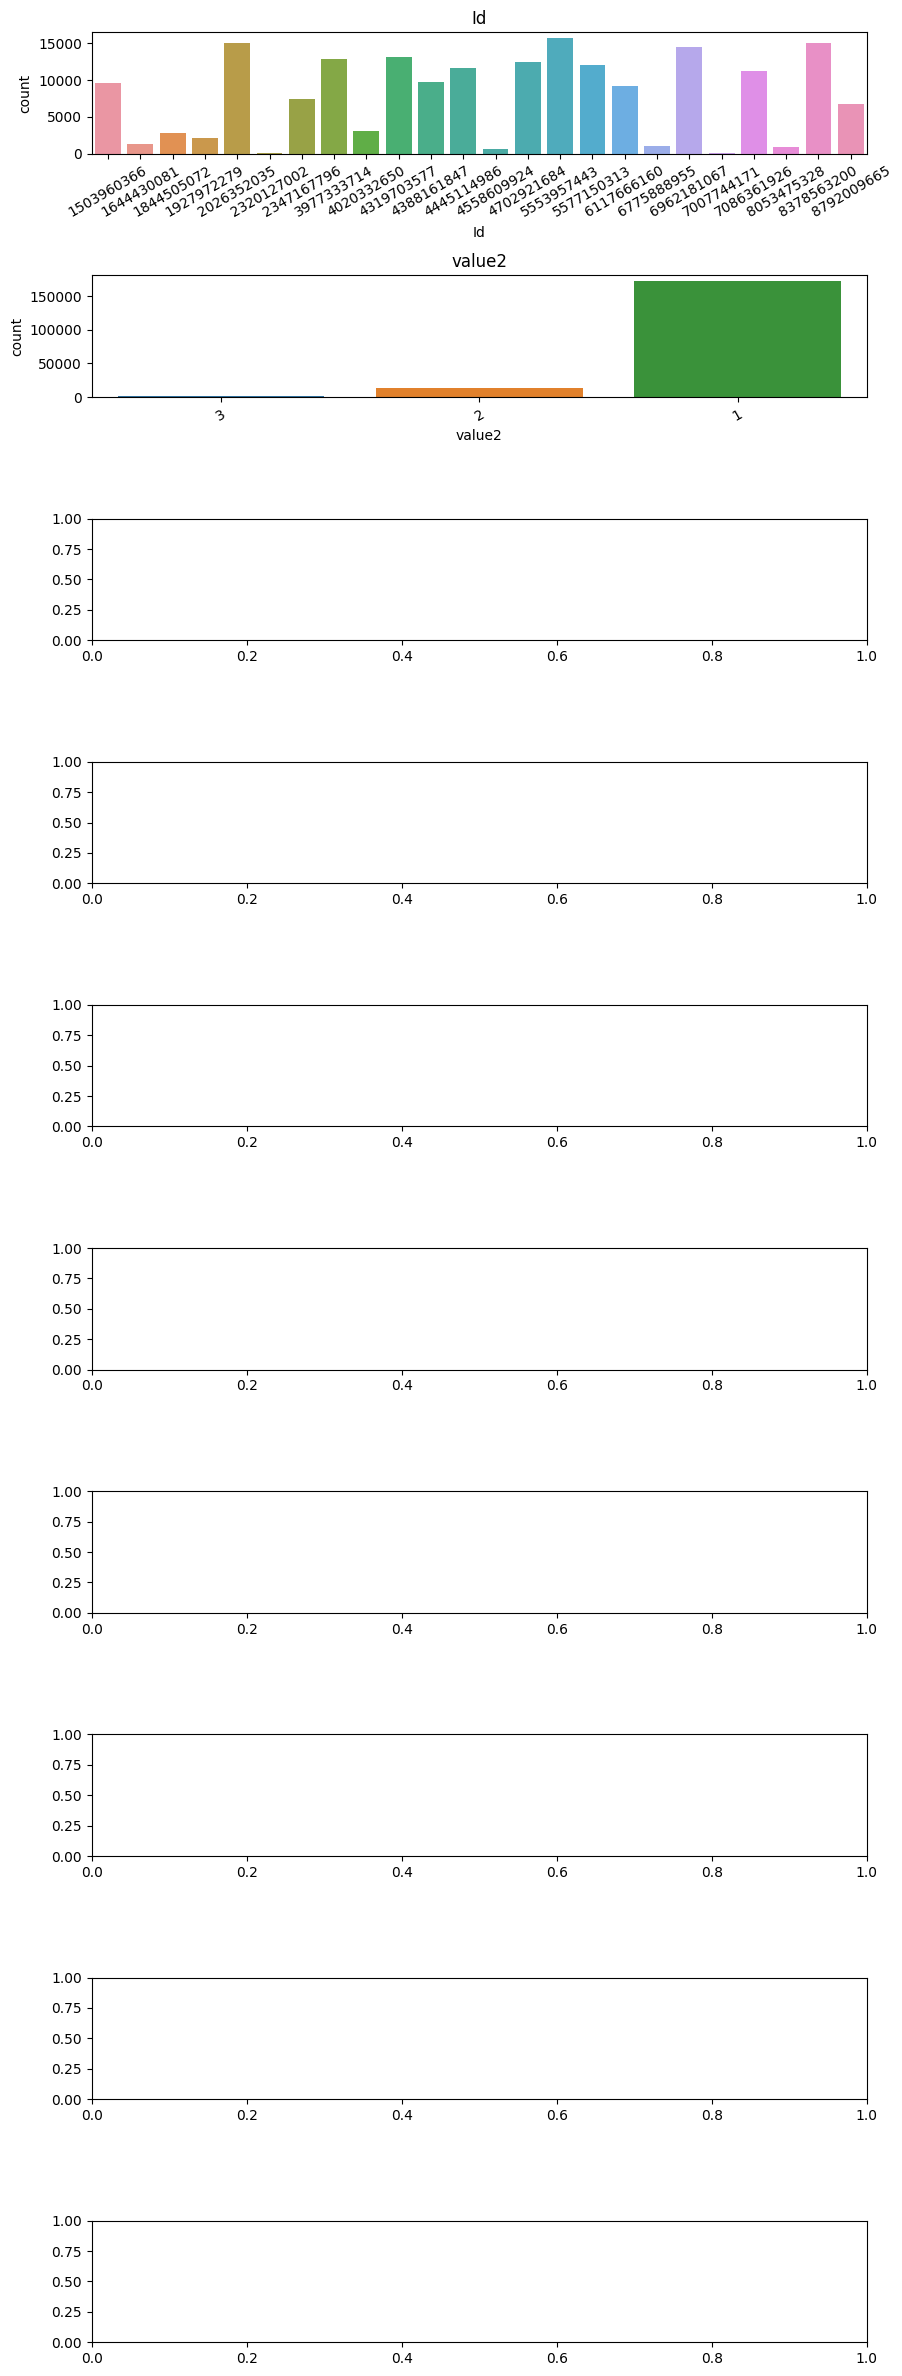

In [44]:
# Graficar los subniveles de cada variable categórica
cols_cat = ['Id', 'value2']

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=sleep, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

## Tenemos la información de los tipos de sueño por minuto de 24 usuarios. Pero, no tenemos la misma cantidad de información por usurio.

In [30]:
sleep.to_csv("sleepDay_merged_clean.csv")